In [33]:
import tensorflow as tf


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    'dataset',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)


val_generator = val_datagen.flow_from_directory(
    'dataset',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)



Found 555 images belonging to 3 classes.
Found 137 images belonging to 3 classes.


In [35]:
print("Class indices:", train_generator.class_indices)

Class indices: {'BSF': 0, 'CRPF': 1, 'Jammu & Kashmir Police': 2}


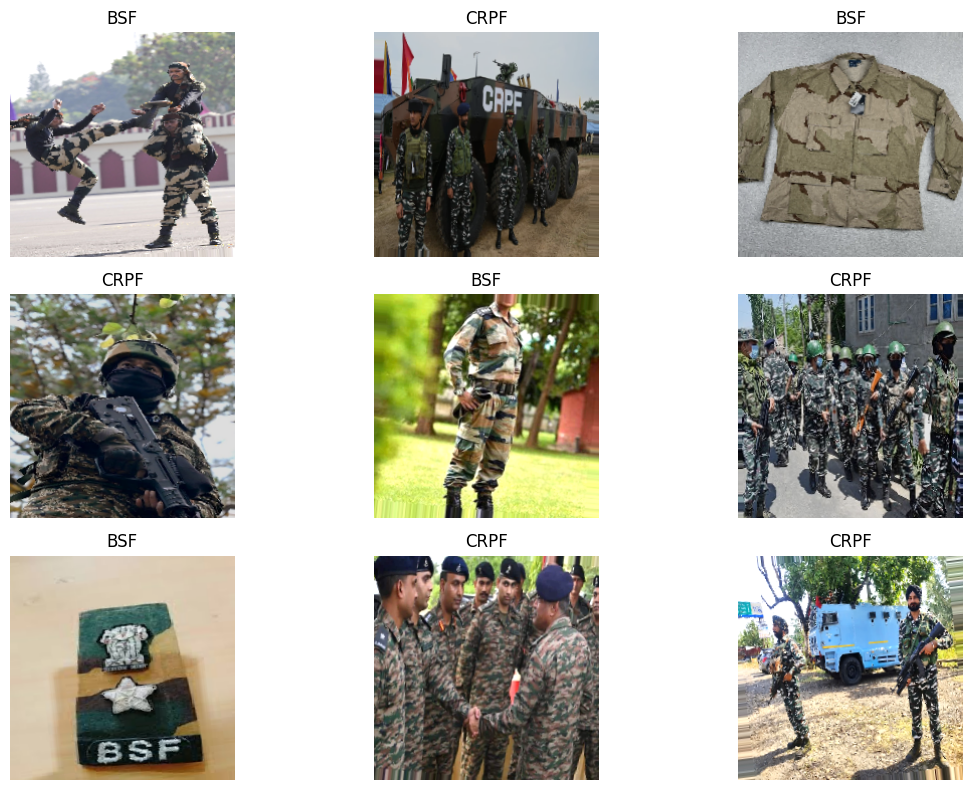

In [58]:
import numpy as np
import matplotlib.pyplot as plt


images, labels = next(train_generator)  
# images, labels = next(val_generator)  

class_names = list(train_generator.class_indices.keys())


plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(class_names[label_index])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [37]:
from tensorflow.keras import layers, models, regularizers

model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)), 
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  
    layers.Dropout(0.6),
    layers.Dense(3, activation='softmax') 
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 dropout_3 (Dropout)         (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 186624)           

In [38]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50 
)


Epoch 1/50
18/18 [==============================] - 28s 1s/step - loss: 5.6114 - accuracy: 0.3315 - val_loss: 1.1400 - val_accuracy: 0.3650
Epoch 2/50
18/18 [==============================] - 26s 1s/step - loss: 1.1212 - accuracy: 0.3532 - val_loss: 1.0914 - val_accuracy: 0.4088
Epoch 3/50
18/18 [==============================] - 31s 2s/step - loss: 1.0780 - accuracy: 0.4486 - val_loss: 1.0512 - val_accuracy: 0.4234
Epoch 4/50
18/18 [==============================] - 35s 2s/step - loss: 1.0172 - accuracy: 0.5207 - val_loss: 0.9836 - val_accuracy: 0.5401
Epoch 5/50
18/18 [==============================] - 30s 2s/step - loss: 0.9639 - accuracy: 0.5495 - val_loss: 0.9818 - val_accuracy: 0.4964
Epoch 6/50
18/18 [==============================] - 25s 1s/step - loss: 0.9293 - accuracy: 0.6090 - val_loss: 0.9972 - val_accuracy: 0.5182
Epoch 7/50
18/18 [==============================] - 27s 1s/step - loss: 0.9276 - accuracy: 0.6000 - val_loss: 0.9337 - val_accuracy: 0.5766
Epoch 8/50
18/18 [==

In [48]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.2f}")

model.save('soldier_uni_classifier.h5')


5/5 [==============================] - 1s 227ms/step - loss: 0.9779 - accuracy: 0.7664
Validation Accuracy: 0.77


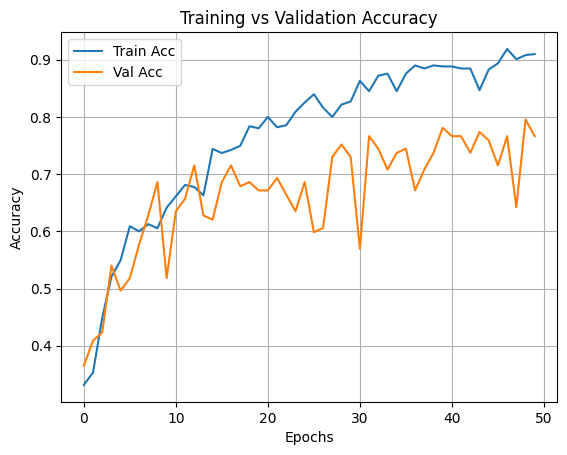

In [59]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()


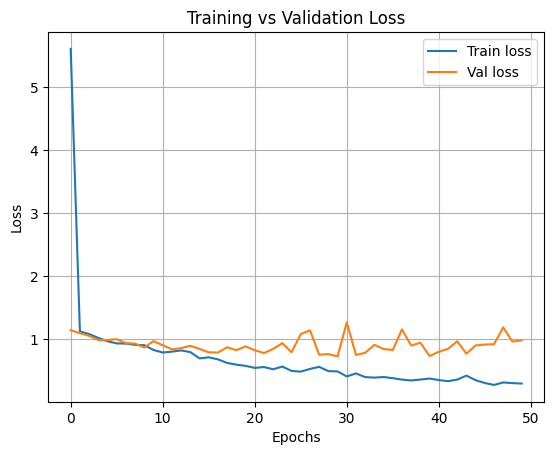

In [60]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()


In [63]:
# Predict on validation data
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes
print(y_true)
print(y_pred)

5/5 [==============================] - 1s 207ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 2 0 0 0 1 0 1 1 2 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 0 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2
 2 0 2 2 2 1 1 2 2 2 2 2 2 2 1 2 0 2 2 2 2 2 2 2 0 2]


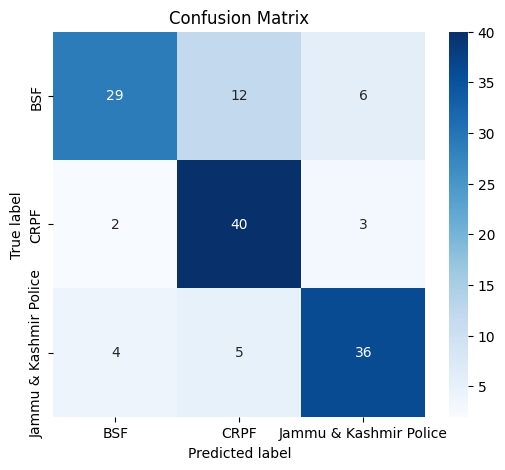

                        precision    recall  f1-score   support

                   BSF       0.83      0.62      0.71        47
                  CRPF       0.70      0.89      0.78        45
Jammu & Kashmir Police       0.80      0.80      0.80        45

              accuracy                           0.77       137
             macro avg       0.78      0.77      0.76       137
          weighted avg       0.78      0.77      0.76       137



In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# Confusion matrix
cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=class_labels))


In [66]:

import numpy as np
from tensorflow.keras.preprocessing import image


def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)
    img_tensor = img_tensor / 255.0  
    img_tensor = np.expand_dims(img_tensor, axis=0)

    pred = model.predict(img_tensor)
    predicted_class = class_labels[np.argmax(pred)]
    confidence = np.max(pred)

    print(f"Predicted Class: {predicted_class} (Confidence: {confidence:.2f})")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{predicted_class} ({confidence:.2f})")
    plt.show()


1/1 [==============================] - 0s 34ms/step
Predicted Class: BSF (Confidence: 0.99)


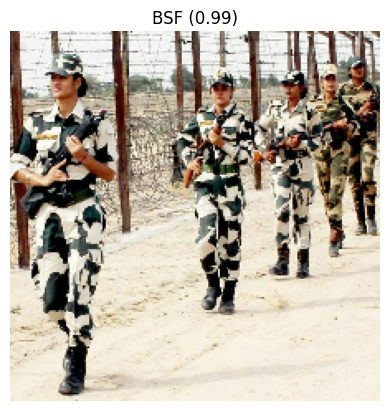

In [71]:
predict_image(r"D:\Anand Gupta\Projects\Soldier Uniform Classifier\Test\BSF\4.jpg")
